# 鸢尾花数据

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['savefig.dpi'] = 100 # 图片像素
plt.rcParams['figure.dpi'] = 100 # 分辨率
plt.rcParams.update({
    'font.family':'Times New Roman',
    # 'text.usetex': True
})

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

iris = datasets.load_iris()
x = iris.data
display(np.shape(x))
y = iris.target
print(y)
len(x)

(150, 4)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


150

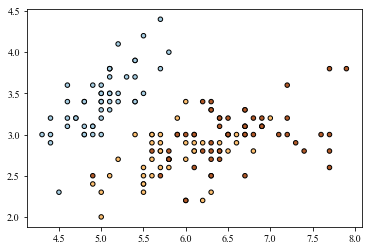

In [3]:
plt.figure()
plt.clf()
plt.scatter(x[: ,0] , x[:, 1], c = y, zorder= 10, cmap = plt.cm.Paired, edgecolor= 'k', s=20)
plt.show()

## Decision Tree

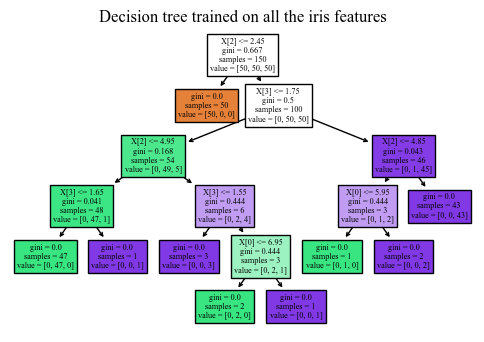

In [4]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
plt.figure(dpi=100)
tree.plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

## SVM 分类

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_mean = np.mean(x_train,0)
x_std = (np.std(x_train, 0)).T

x_normalized = (x_train - x_mean) / (np.std(x_train, 0))


clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)

clfmod = SVC(kernel='rbf', gamma = 'auto')
clfmod.fit(x_normalized, y_train)

SVC(gamma='auto')

In [6]:
print(clf.score(x_test, y_test))

1.0


In [7]:
print(clfmod.score((x_test - x_mean) / x_std, y_test))

1.0


## Naive

In [8]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

1.0

## K-means

In [9]:
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1, init='random', learning_rate='auto')
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

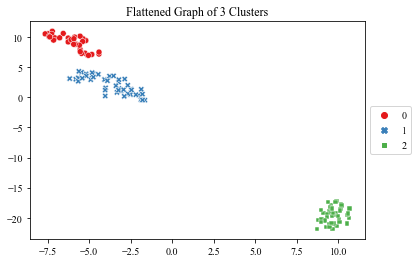

In [10]:
import pandas as pd
x_normalized_df = pd.DataFrame(x_normalized, columns = ['sepal_len','sepal_width','petal_len', 'petal_width'])
x_train = pd.DataFrame(x_train, columns = ['sepal_len','sepal_width','petal_len', 'petal_width'])

df_rfm_k4 = kmeans(x_normalized_df, 3, x_train)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.savefig('flattened.png', format='png', dpi=1000)
plt.show()

In [11]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df_rfm_original.index, 
                                       columns=df_rfm_original.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['Cluster'],
                        value_vars=['sepal_len','sepal_width','petal_len', 'petal_width'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')

    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

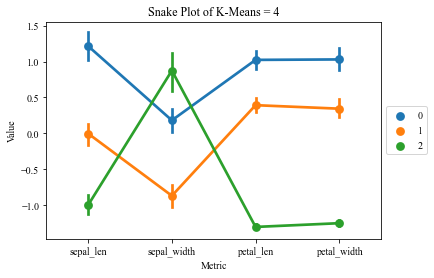

In [12]:
plt.figure()
plt.title('Snake Plot of K-Means = 4')
snake_plot(x_normalized_df, df_rfm_k4, x_train)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## DBSCAN

In [13]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=6)

clustering.fit(x_normalized)

print(clustering.fit_predict((x_test - x_mean) / x_std ))

[ 0  1 -1  0  0  1  0  0 -1  0  0  1  1  1  1  0  0  0  0  0  1  0  1  0
 -1  0  0  0  1  1]


In [14]:
def affine(x):
    if x == 1:
        return 0
    if x == -1:
        return 2
    if x == 0:
        return 1

In [15]:
labels = map(affine, clustering.labels_)
print(np.asarray(list(labels)))
print(y_test)

[1 0 2 1 1 0 1 1 2 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 2 1 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


##	层次聚类AGNES/DIANA

In [16]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(x_normalized)
print(clustering.fit_predict((x_test - x_mean) / x_std))
print(y_test)

[2 1 0 2 0 1 2 0 0 2 0 1 1 1 1 0 0 2 2 0 1 0 1 0 0 0 0 0 1 1]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [17]:
def affine2(x):
    if x == 2:
        return 1
    if x == 1:
        return 0
    if x == 0:
        return 2

In [18]:
labels = map(affine2, clustering.labels_)
print(np.asarray(list(labels)))
print(y_test)

[1 0 2 1 2 0 1 2 2 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## Spectral

In [19]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(2, n_init=10,
                        assign_labels='discretize')
sc.fit(x_normalized)
print(clustering.fit_predict((x_test - x_mean) / x_std))
print(y_test)

[2 1 0 2 0 1 2 0 0 2 0 1 1 1 1 0 0 2 2 0 1 0 1 0 0 0 0 0 1 1]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## TODO
**如何求花瓣特征的邻接矩阵**

In [20]:
sc = SpectralClustering(3, affinity='precomputed', n_init=100,
                        assign_labels='discretize')
# sc.fit_predict(adjacency_matrix)